## Описание проекта 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта**: выявление закономерностей, определяющих успешность компьютерных игр, на основе исторических данных о продажах, оценках пользователей и критиков, жанрах и платформах. Выявленные закономерности призваны помочь интернет-магазину сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для повышения продаж в 2017 году.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
pd.options.mode.chained_assignment = None

## Загрузка данных, изучение общей информации

In [3]:
# загрузка данных

games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [4]:
# общая информация

display(games.shape)
display(games.info())
games

(16715, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
print(f'Количество пропусков:\n', games.isna().sum(), sep='\n', end='\n\n')
print(f'Количество явных дубликатов: {games.duplicated().sum()}')

Количество пропусков:

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Количество явных дубликатов: 0


In [6]:
# преобразуем строковые данные к нижнему регистру
games['Name'] = games['Name'].str.lower()
games['Platform'] = games['Platform'].str.lower()

# объединение для проверки на дубликаты
games_combined = games[['Name', 'Platform', 'Year_of_Release']]
print(f'Количество дубликатов: {games_combined.duplicated().sum()}')

Количество дубликатов: 2


In [7]:
games_combined.drop_duplicates(inplace=True)
print(f'Количество дубликатов: {games_combined.duplicated().sum()}')

Количество дубликатов: 0


**Микровывод**:  Исходный датасет содержит информацию о видеоиграх и состоит из 16715 строк и 11 столбцов. Структура датасета:  

Name: название игры (object)  
Platform: платформа, на которой доступна игра (object)  
Year_of_Release: год выпуска игры (float64)  
Genre: жанр игры (object)  
NA_sales: продажи в Северной Америке (млн копий, float64)  
EU_sales: продажи в Европе (млн копий, float64)  
JP_sales: продажи в Японии (млн копий, float64)  
Other_sales: продажи в других регионах (млн копий, float64)  
Critic_Score: оценка критиков (по 100-балльной шкале, float64)  
User_Score: оценка пользователей (по 10-балльной шкале, object)  
Rating: рейтинг игры по версии ESRB (object)  

В данных довольно много пропусков, на шаге предобработки нам предстоит установить причину этого и заполнить/удалить пропуски в столбцах Name, Year_of_Release, Genre Critic_Score, User_Score, Rating. Кроме того, в столбце User_Score установлен неверный тип данных: его предстоит поменять с object на float; так же как и в Year_of_Release: поменяем с float на int, тк год - целочисленное значение. Явных дубликатов в датасете не наблюдается.

## Предобработка данных

### Приведем названия столбцов к нижнему регистру. 

In [8]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типа данных

Изменим тип данных в столбце user_score на float. По условию пользователи оценивали игры по десятибалльной шкале => средняя оценка должна храниться в формате числа с плавающей запятой, но никак не строкой.  
  
Для начала посмотрим какие значения вообще хранит в себе столбец user_score:

In [9]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Изучив информацию в сети, можно выяснить, что TBD – это аббревиатура, которая означает фразу “To Be Determined”. Если игра недавно вышла или еще не получила достаточное количество оценок от пользователей, пользовательский рейтинг может быть помечен как "tbd" до тех пор, пока не будет получено достаточно данных для формирования окончательной оценки.

In [10]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,ps2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,udraw studio,wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,frogger's adventures: temple of the frog,gba,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,bust-a-move 3000,gc,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,mega brain boost,ds,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,plushees,ds,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Таким образом, tbd представляет собой не что иное, как NaN. Поскольку нам необходимо привести столбец к числовому типу данных, заменим и tbd, и NaN на -1. 

In [11]:
games['user_score'] = games['user_score'].replace('tbd', float('nan'))
games['user_score'] = games['user_score'].fillna(-1)
games['user_score'] = games['user_score'].astype(float)

In [12]:
# проверка

display(games['user_score'].describe())
print(games[games['user_score'] == 'tbd'])
print(games['user_score'].isna().sum())

count    16715.000000
mean         2.689447
std          4.169833
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
0


Тип данных успешно изменен. Тип данных в столбце year_of_release заменим в следующем пункте, тк для этого сначала нужно удалить пропуски. В остальных столбцах этого не требуется, данные в них соответствуют заявленным типам.

### Обработка пропусков

Предлагаю работать с каждым столбцом по порядку. Столбцы, содержащие пропуски: name, year_of_release, genre, critic_score, user_score, rating.

In [13]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64

#### name и genre

In [14]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


Совпало так, что строки, содержащие пропуски в названии содержат и те самые два пропущенных значения жанра. Скорее всего пропуски возникли вследствие ошибок при сборе данных из баз. А если запись не содержит названия игры, то и жанр также будет неизвестен, поскольку он обычно определяется для конкретной игры.  

Поскольку невозможно предложить альтернативу в случае если пропущено самое главное - название - то предлгаю эти две строки просто удалить.

In [15]:
games = games.dropna(subset=['name'])

# проверка
print(games['name'].isna().sum())
print(games['genre'].isna().sum())

0
0


#### year_of_release

In [16]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,-1.0,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,Sports,0.01,0.00,0.00,0.00,43.0,-1.0,E10+
16405,freaky flyers,gc,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,-1.0,NaN


269 пропущенных значений в столбце с годом выпуска. Поскольку игры выпускались на разных платформах, а информация собиралась с разных источников, могла возникнуть ситуация, когда для одной и той же игры одна платформа указывала год выпуска, а другая нет. Попробуем заполнить пропуски, обратившись к информации с других платформ. 

In [17]:
# группируем по name и заполняем пропущенные значения в year_of_release

games['year_of_release'] = games['year_of_release'].fillna(games.groupby('name')['year_of_release'].transform('max'))
games['year_of_release'].isna().sum()

146

Также возможна ситуация, когда само название игры содержит в себе год выпуска (особенно игры жанра спорт). Например, 'Madden NFL 2004' - это означает, что игра готовилась для сезона 2003-2004 и выпустилась в 2003 году. 

In [18]:
# функция для поиска года в строке
def extract_year(name):
    match = re.search(r'\b\d{4}\b', name)
    if match:
        return int(match.group())
    else:
        return None

games['extracted_year'] = games['name'].apply(lambda x: extract_year(x))

# проверка
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,extracted_year
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,-1.0,NaN,2006.0
627,rock band,x360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,NaN
657,frogger's adventures: temple of the frog,gba,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,-1.0,E,NaN
805,rock band,wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,NaN
1142,rock band,ps3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16277,homeworld remastered collection,pc,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,NaN
16288,shorts,ds,NaN,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,E10+,NaN
16348,agarest senki: re-appearance,ps3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,-1.0,NaN,NaN
16458,hakuouki: shinsengumi kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,-1.0,NaN,NaN


Действительно, для игры 'wwe Smackdown vs. Raw 2006' в столбце extracted_year появилось значение 2006. 

In [19]:
games['year_of_release'] = games['year_of_release'].fillna(games['extracted_year'])

# удаляем временный столбец
games.drop(columns=['extracted_year'], inplace=True)
games['year_of_release'].isna().sum()

139

Остальные 139 строк с пропусками предлагаю удалить. Это не повлияет на статистику, тк в объеме это даже меньше, чем 1% от исследуемых данных. 

In [20]:
games.dropna(subset=['year_of_release'], inplace=True)

# проверка
games['year_of_release'].isna().sum()

0

Теперь можно изменить тип данных с float на int. Год - это целочисленное значение.  

In [21]:
games['year_of_release'] = games['year_of_release'].astype(int)

# проверка
games['year_of_release'].dtype

dtype('int64')

#### critic_score и user_score

В данных столбцах 8578 и 6701 пропусков соответственно, что составляет практически половину от всех записей. Не у всех игр есть оценки от критиков или пользователей, это может быть особенно актуально для менее известных игр, а также для старых игр, выпущенных до распространения цифровых платформ.  

Пропущенных значений слишком много, чтобы их просто удалить или заполнить медианными значениями по году или жанру. Более того, оценка - слишком субъективная вещь для каждой игры, чтобы ее возможно было предположить/предугадать. Предлагаю заполнить пропуски индикаторным значением, например, -1. 

*Это уже было сделано для стообца user_score на этапе изменения типов данных, поэтому работаем только с critic_score.*

In [22]:
games['critic_score'] = games['critic_score'].fillna(-1)

# проверка
games['critic_score'].isna().sum()

0

#### rating

В данном столбце 6766 пропусков - это так же огромная часть данных. Возможная причина пропусков может быть связана с тем, что некоторые игры были выпущены до 1994 года (год основания ESRB) или же были выпущены в регионах, где система рейтинга не была широко распространена или обязательна. Более того, некоторые игры (особенно независимые/неофициальные проекты) могут быть выпущены без участия издателей, которые обязаны предоставлять рейтинг ESRB.  

Опять же, пропусков слишком много, чтобы записи можно было просто удалить. Пытаться заполнить самыми частыми значениями по жанру так же бессмысленно, контент каждой отдельной игры индвидуален. Предлагаю заполнить пропуски строкой 'No Rating'. 

In [23]:
games['rating'] = games['rating'].fillna('No Rating')

Посмотрим на общую картину датасета после проведенной обработки. 

In [24]:
display(games.shape)
display(games.info())
display(games.isnull().sum())
games

(16574, 11)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     16574 non-null  float64
 9   user_score       16574 non-null  float64
 10  rating           16574 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


None

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No Rating
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No Rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,No Rating
16711,lma manager 2007,x360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,No Rating
16712,haitaka no psychedelica,psv,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,No Rating
16713,spirits & spells,gba,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,No Rating


Отлично, теперь пропуски отсутствуют, а количество записей в датасете практически не изменилось, данные не утеряны. 

In [25]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No Rating,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No Rating,31.38


**Микровывод**. На данном этапе была проведена предобработка данных:  

- названия столбцов были приведены к нижнему регистру;  
- изменены типы данных в двух столбцах: year_of_release и user_score;
- определены возможные причины пропущенных значений;
- пропуски в столбцах name и genre были удалены; в столбце year_of_release по возможности восстановлены; в столбцах critic_score, user_score и rating заменены значением-"маркером";
- добавлен столбец с суммарными продажами по всем регионам.

In [26]:
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     16574 non-null  float64
 9   user_score       16574 non-null  float64
 10  rating           16574 non-null  object 
 11  total_sales      16574 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en c

## Исследовательский анализ

### Cколько игр выпускалось в разные годы?

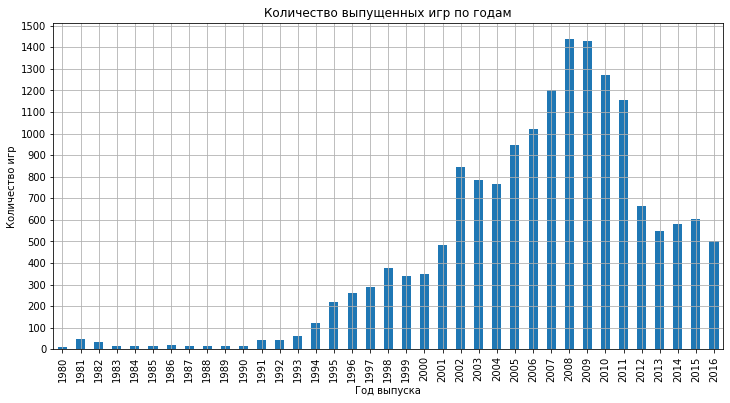

In [27]:
games_per_year = games['year_of_release'].value_counts().sort_index()

games_per_year.plot(kind='bar', figsize=(12, 6))
                    
plt.yticks(range(0, games_per_year.max() + 100, 100))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
                    
plt.show()

График показывает количество выпущенных игр по годам с 1980 по 2016 год. Несколько важных наблюдений:

- Рост количества игр, начиная с середины 90-х. Это может быть связано с развитием игровых консолей и ростом популярности видеоигр.  
- Наибольшее количество игр было выпущено в 2008 и 2009 годах (расцвет новых xbox и playstation). После 2009 года количество выпущенных игр начало снижаться (возможно, связано с резко возросшей конкуренцией).
- Резкий спад в 2012 году. Возможно, это связано с ростом популярности мобильных игр (переключение внимания разработчиков на создание мобильных игр, что также могло сократить количество традиционных релизов для консолей и ПК)
- В последние годы наблюдается небольшой рост количества выпущенных игр, что может быть связано с увеличением популярности инди-игр и появлением новых платформ для их распространения (например, steam).  

Предлагаю учитывать статистику, начиная с 1994 года. На мой взгляд данные раньше этого года не релевантны, поскольку в год выпускалось менее 100 игр. 

### Как менялись продажи по платформам? 

In [28]:
# самые продаваемые платформы

platform_sales = games[games['year_of_release'] >= 1994].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(5).index # топ-5 по продажам
top_platforms

Index(['ps2', 'x360', 'ps3', 'wii', 'ds'], dtype='object', name='platform')

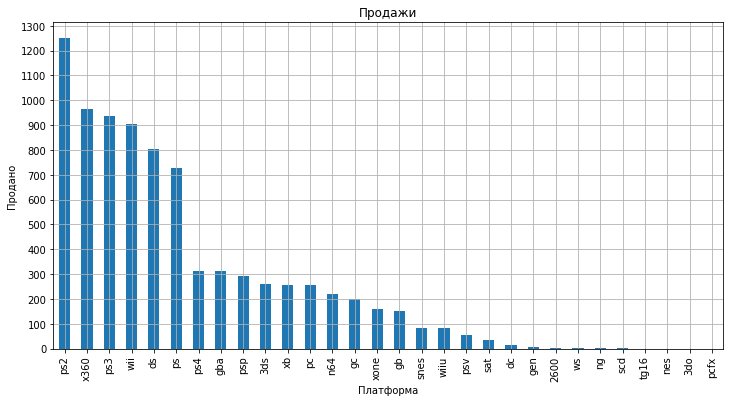

In [29]:
platform_sales.plot(kind='bar', figsize=(12, 6))
                    
plt.yticks(range(0, int(platform_sales.max()) + 100, 100))
plt.title('Продажи')
plt.xlabel('Платформа')
plt.ylabel('Продано')
plt.grid(True)
                    
plt.show()

Безусловным лидером продаж оказался PS2. С большим отрывом за ним идет X360, также в топ-5 попали PS3, Wii и DS. 

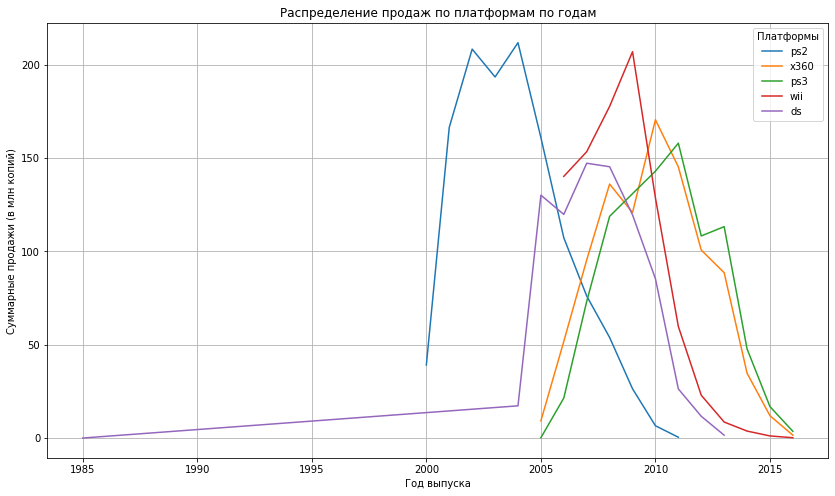

In [30]:
# фильтрация данных по выбранным платформам
top_platforms_data =games[games['platform'].isin(top_platforms)]

# распределение продаж по годам 
plt.figure(figsize=(14, 8))

for platform in top_platforms:
    platform_data = top_platforms_data[top_platforms_data['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales, label=platform)

plt.title('Распределение продаж по платформам по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (в млн копий)')
plt.legend(title='Платформы')
plt.grid(True)
plt.show()

Средний срок существования игровых платформ - примерно 10 лет. Пик продаж обычно приходится на середину жизненного цикла платформы, когда она наиболее популярна и поддерживается большим количеством новых игр. Когда одна платформа начинает терять популярность, обычно появляется новое поколение платформ, которое захватывает рынок. Например, после спада PS2 вышли PS3 и X360, взявшие на себя основную долю рынка.

In [31]:
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

8.0

### Потенциально прибыльные платформы

Определим актуальный период, такой, чтобы данные помогали построить прогноз на 2017 год.  

Предлагаю рассматривать период 2005-2016 года как актуальный. В это время вышли, достигали своего пика и шли на спад перед выпуском новых моделей самые популярные платформы. Полностью владея данными о них, можно будет заметить нужные нам тенденции. 

Какие же платформы лидируют по продажам, растут или падают?

In [32]:
# отфильтруем данные по году
filtered_data = games[(games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)]
filtered_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,No Rating,14.63
33,pokemon x/pokemon y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,No Rating,14.60
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,No Rating,0.01
16707,aiyoku no eustia,psv,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,No Rating,0.01
16710,samurai warriors: sanada maru,ps3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,No Rating,0.01
16712,haitaka no psychedelica,psv,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,No Rating,0.01


In [33]:
# суммарные продажи для каждой платформы за каждый год
yearly_sales = filtered_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# если какие-то платформы не имели продаж в определенные годы
yearly_sales = yearly_sales.fillna(0)

yearly_sales

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.63,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


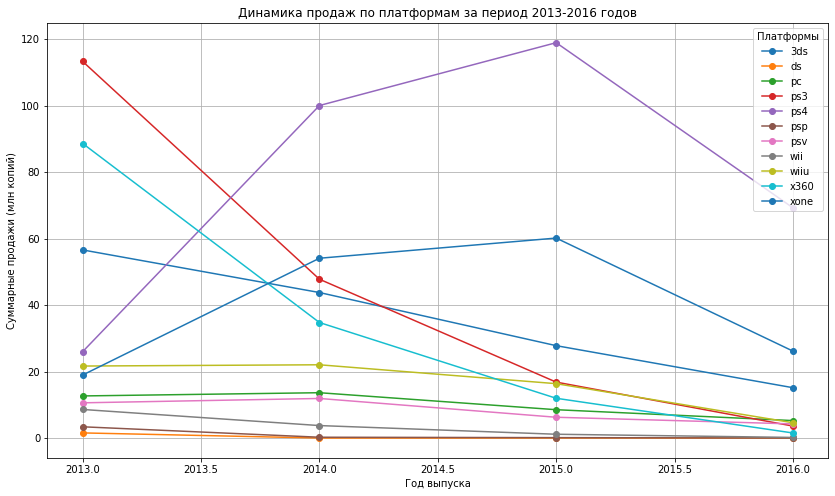

In [34]:
plt.figure(figsize=(14, 8))

for platform in yearly_sales.columns:
    plt.plot(yearly_sales.index, yearly_sales[platform], label=platform, marker='o')

plt.title('Динамика продаж по платформам за период 2013-2016 годов')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформы', loc='upper right')
plt.grid(True)
plt.show()

In [35]:
# анализ роста и падения платформ
total_sales_by_platform = yearly_sales.sum()

# платформы-лидеры по суммарным продажам
leaders = total_sales_by_platform.sort_values(ascending=False)
print("Платформы-лидеры по суммарным продажам за актуальный период:")
leaders

Платформы-лидеры по суммарным продажам за актуальный период:


platform
ps4     314.14
ps3     181.43
xone    159.32
3ds     143.25
x360    136.80
wiiu     64.63
pc       40.06
psv      32.99
wii      13.66
psp       3.74
ds        1.54
dtype: float64

**Три платформы-лидера по суммарным продажам за актуальный период: PS4, PS3 и XOne.**

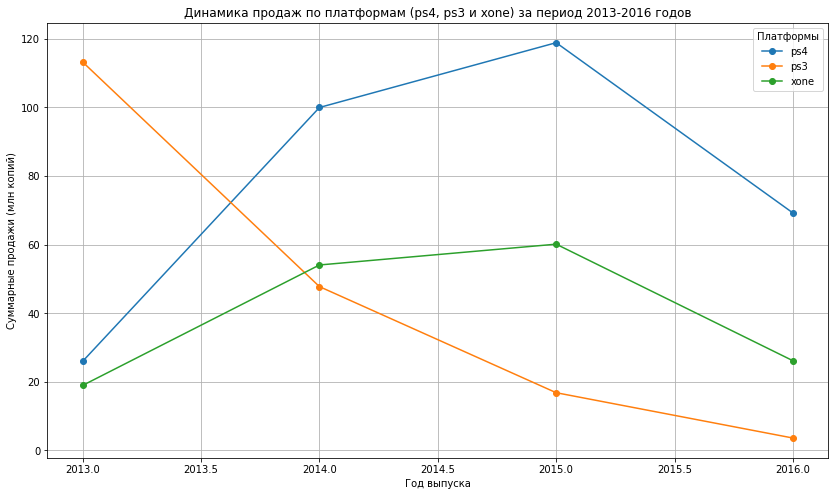

In [36]:
top_3 = ['ps4', 'ps3', 'xone']
yearly_sales_top = yearly_sales[top_3]


plt.figure(figsize=(14, 8))

for platform in top_3:
    plt.plot(yearly_sales_top.index, yearly_sales_top[platform], label=platform, marker='o')

plt.title('Динамика продаж по платформам (ps4, ps3 и xone) за период 2013-2016 годов')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформы', loc='upper right')
plt.grid(True)
plt.show()

**PS4**:  

PS4 показала значительный рост с момента выпуска в 2013 году, достигнув пика в 2015 году, после чего продажи начали снижаться. Пик продаж - около 120 млн копий.

**PS3**:

PS3 достигла своего пика до 2013 года и с тех пор наблюдается значительное снижение продаж по мере того, как рынок переключается на более новые консоли, вероятно, именно на платформу нового поколения PS4. 

**XOne**:

XOne также показала рост с 2013 года, достигнув пика в 2015 году, но затем продажи начали постепенно снижаться. 

PS4 и XOne достигли своего пика в 2015 года, все еще оставаясь лидерами к 2016 году. PS3, хоть и обладает относительно высокими продажами, стремительно теряет свою популярнность, проигрывая PS4.

### Глобальные продажи игр в разбивке по платформам.

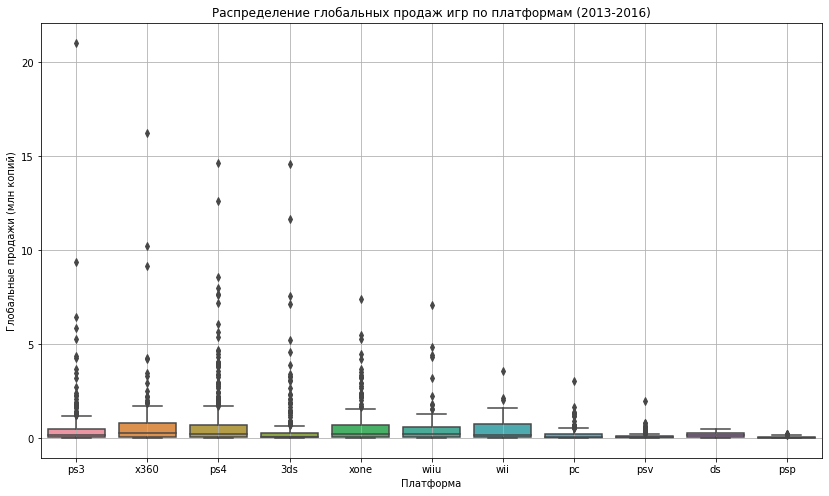

In [37]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data, x='platform', y='total_sales')

plt.title('Распределение глобальных продаж игр по платформам (2013-2016)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий)')
plt.grid(True)
plt.show()

Рассмотрим ближе. 

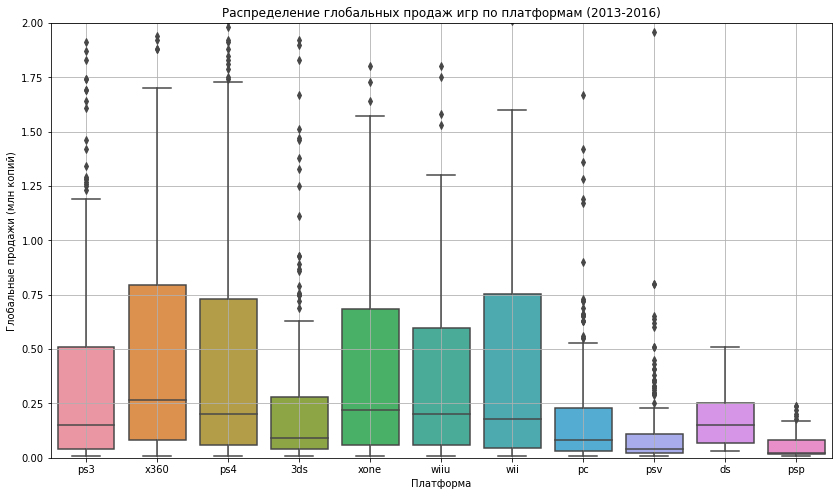

In [38]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data, x='platform', y='total_sales')
plt.ylim([0, 2])

plt.title('Распределение глобальных продаж игр по платформам (2013-2016)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий)')
plt.grid(True)
plt.show()

Вывод по графику:


1. Наиболее значительный разброс наблюдается у платформ PS3, X360, PS4, 3DS, XOne и Wiiu. Это свидетельствует о большом разнообразии продаж игр на этих платформах: от низких до очень высоких. У остальных платформ разброс менее значительный, что говорит о более стабильных, но, возможно, менее впечатляющих продажах.  

2. Наибольшее количество выбросов, отражающих экстремальные продажи, можно видеть у платформ PS3 и X360. Это свидетельствует о наличии игр, которые значительно выделяются по сравнению с большинством других.  

3. Платформы X360, PS3, PS4 и XOne имеют медианные значения продаж выше, чем у большинства других платформ. Это указывает на устойчивые высокие продажи большинства игр на этих платформах. 

**В период с 2013 по 2016 годы наибольшие глобальные продажи игр наблюдались на платформах PS3, X360, PS4, 3DS и XOne**. Эти платформы обеспечивали как высокие медианные значения продаж, так и наличие игр с экстремально высокими показателями продаж.

### Влияние отзывов

Для анализа влияния отзывов пользователей и критиков на продажи игр внутри одной популярной платформы, можно выбрать, например, платформу X360. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [39]:
print(len(filtered_data.query("critic_score > 0")))
print(len(filtered_data.query("user_score > 0")))
print(len(filtered_data.query("critic_score > 0 & user_score > 0")))

994
1195
979


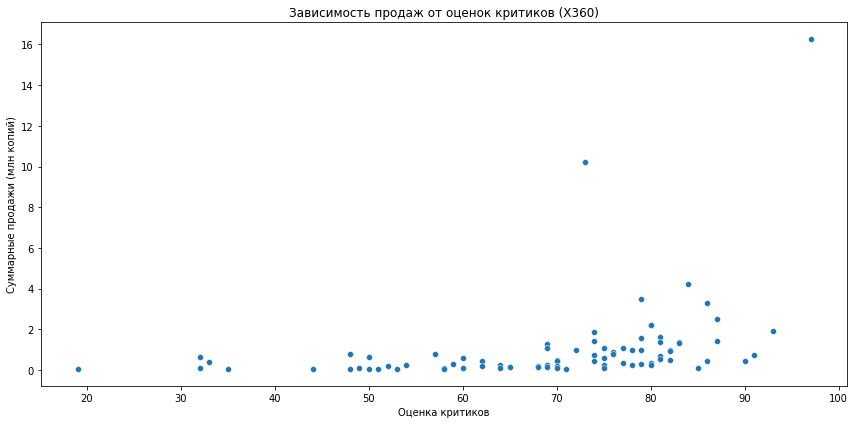

In [40]:
# фильтруем данные по платформе X360
x360_data = filtered_data[filtered_data['platform'] == 'x360']

# удаляем строки с отсутствующими значениями
x360_data_critics = x360_data[x360_data['critic_score'] > 0]

# оценки критиков
plt.figure(figsize=(12, 6))
sns.scatterplot(data=x360_data_critics, x='critic_score', y='total_sales')
plt.title('Зависимость продаж от оценок критиков (X360)')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи (млн копий)')


plt.tight_layout()
plt.show()

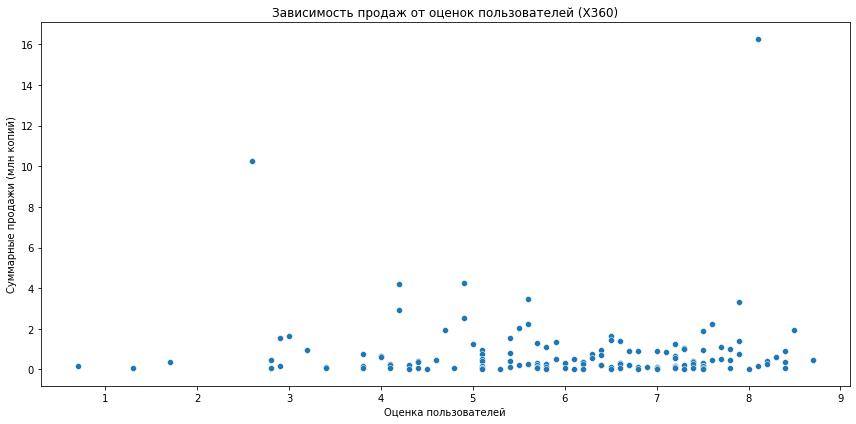

In [41]:
# оценки пользователей

x360_data_users = x360_data[x360_data['user_score'] > 0]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=x360_data_users, x='user_score', y='total_sales')
plt.title('Зависимость продаж от оценок пользователей (X360)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи (млн копий)')

plt.tight_layout()
plt.show()

На диаграмме зависимости продаж от оценок критиков можно увидеть положительную зависимость: чем выше оценка критиков, тем больше суммарные продажи игр. При оценках выше 70 баллов можно наблюдать значительный рост продаж, а максимальные продажи соответствуют высоким оценкам критиков (80 и выше).   

На диаграмме зависимости продаж от оценок пользователей можно заметить, что зависимость менее выражена по сравнению с оценками критиков. Тем не менее, игры с оценками пользователей выше 7 имеют тенденцию продаваться лучше, хотя разброс данных значительно больше.

In [42]:
# расчет корреляции
critic_corr = x360_data_critics['critic_score'].corr(x360_data['total_sales'])
user_corr = x360_data_users['user_score'].corr(x360_data['total_sales'])

critic_corr, user_corr

(0.3503445460228664, -0.011742185147181342)

Значение коэффициента корреляции ~0.36 указывает на умеренную положительную корреляцию. Оценки критиков имеют достаточно значительное влияние на продажи игр.  

Значение коэффициента корреляции ~-0.01 указывает на фактическое отсутствие корреляции. Это означает, что влияние оценок пользователей на продажи игр не влияет.

### Корреляция на других платформах

Как мы выяснили раннее, в топ-5 лидеров продаж входят платформы PS3, X360, PS4, 3DS и XOne. Посчитаем корреляцию между отзывами и продажами для них.

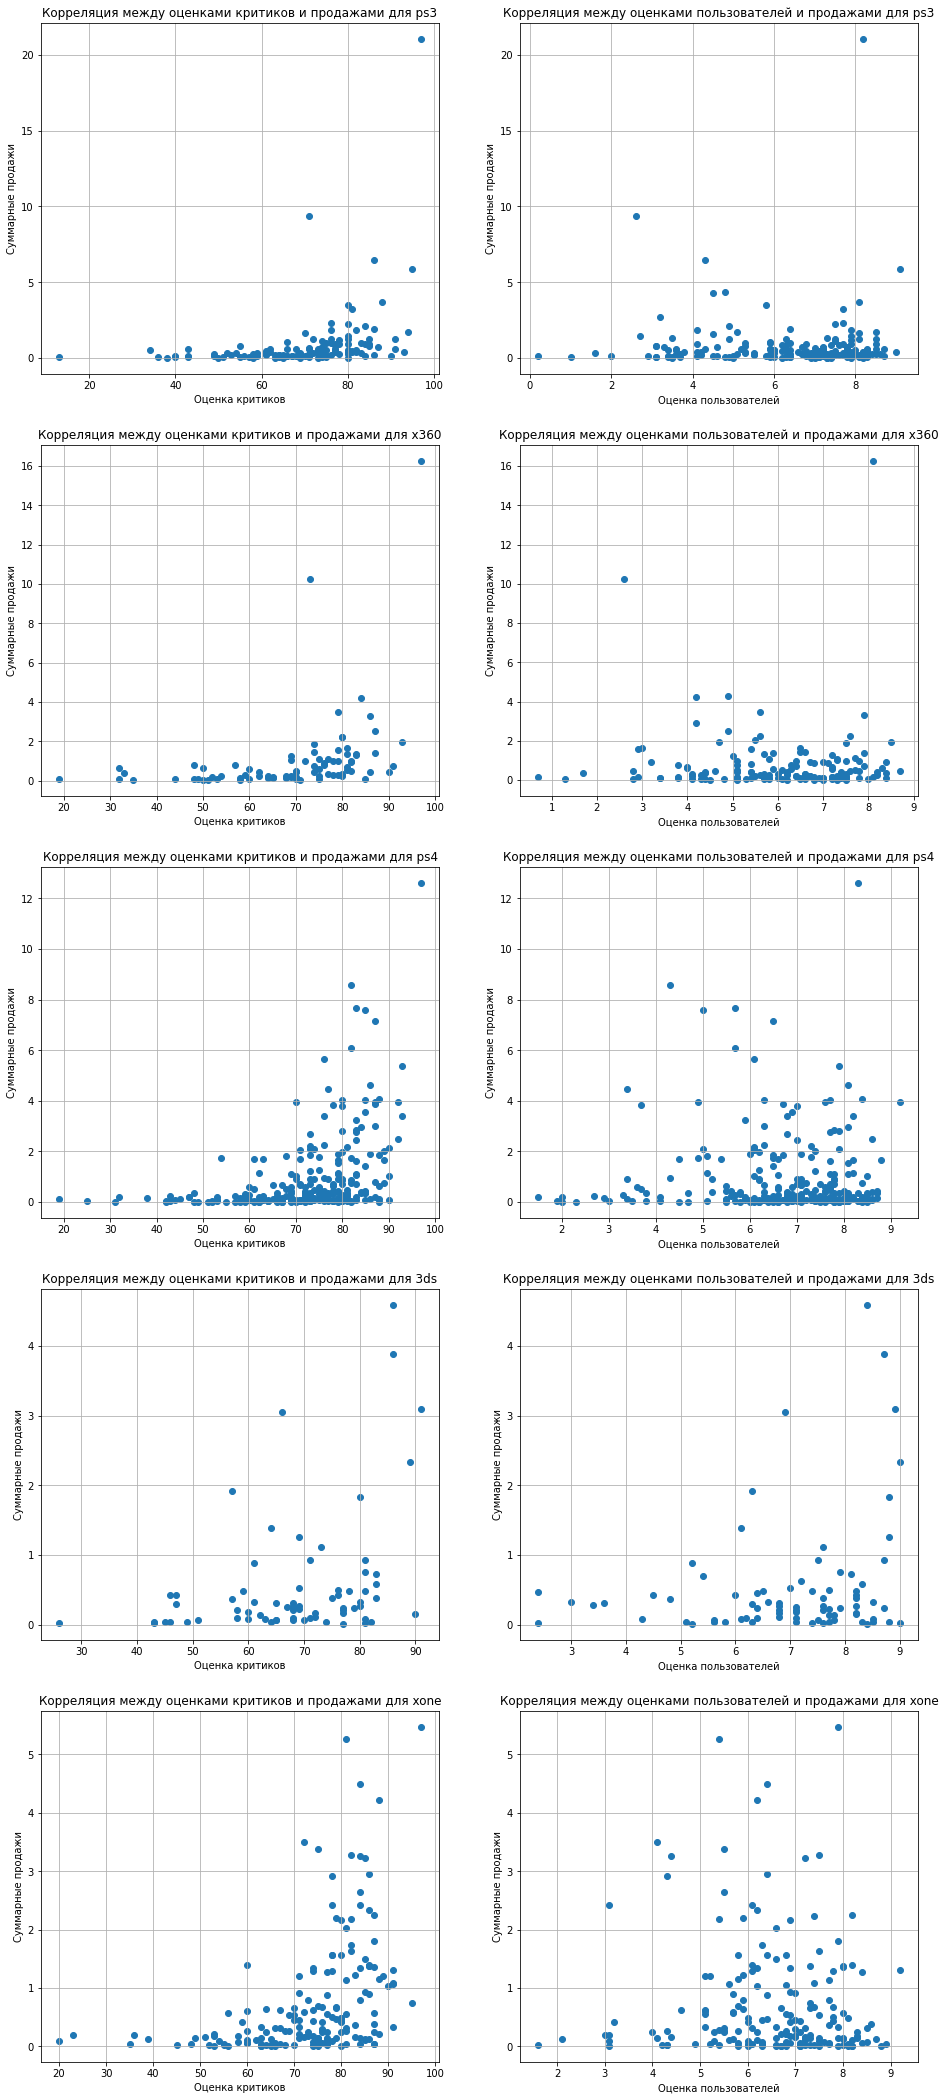

,Платформа,Корреляция критики,Корреляция пользователи
0,ps3,0.334285,0.002394
1,x360,0.350345,-0.011742
2,ps4,0.406568,-0.031957
3,3ds,0.357057,0.241504
4,xone,0.416998,-0.068925


In [44]:
top_platforms = ['ps3', 'x360', 'ps4', '3ds', 'xone']
filtered_data_top_platforms = filtered_data[filtered_data['platform'].isin(top_platforms)]

platforms = []
critic_corr = []
user_corr = []

fig, axes = plt.subplots(nrows=len(top_platforms), ncols=2, figsize=(14, 30))
fig.tight_layout(pad=5.0)

for i, platform in enumerate(top_platforms):
    platform_data = filtered_data_top_platforms[filtered_data_top_platforms['platform'] == platform]
    
    # временная фильтрация по оценкам критиков
    critic_data = platform_data[platform_data['critic_score'] > 0]
    critic_corr_value = critic_data['critic_score'].corr(critic_data['total_sales'])
    critic_corr.append(critic_corr_value)
    
    # диаграмма рассеяния для оценок критиков
    axes[i, 0].scatter(critic_data['critic_score'], critic_data['total_sales'])
    axes[i, 0].set_title(f'Корреляция между оценками критиков и продажами для {platform}')
    axes[i, 0].set_xlabel('Оценка критиков')
    axes[i, 0].set_ylabel('Суммарные продажи')
    axes[i, 0].grid(True)
    
    # временная фильтрация по оценкам пользователей
    user_data = platform_data[platform_data['user_score'] > 0]
    user_corr_value = user_data['user_score'].corr(user_data['total_sales'])
    user_corr.append(user_corr_value)
    
    # диаграмма рассеяния для оценок пользователей
    axes[i, 1].scatter(user_data['user_score'], user_data['total_sales'])
    axes[i, 1].set_title(f'Корреляция между оценками пользователей и продажами для {platform}')
    axes[i, 1].set_xlabel('Оценка пользователей')
    axes[i, 1].set_ylabel('Суммарные продажи')
    axes[i, 1].grid(True)

# таблица корреляций
correlation_results = pd.DataFrame({
    'Платформа': top_platforms,
    'Корреляция критики': critic_corr,
    'Корреляция пользователи': user_corr
})

plt.show()

correlation_results


На всех рассмотренных платформах оценки критиков оказывают более значительное влияние на продажипо сравнению с оценками пользователей. Исключением является платформа 3DS, на которой и оценки критиков, и оценки пользователей имеют положительную корреляцию с продажами.  

В среднем, корреляция между оценками критиков и продажами держится на уровне 0.3-0.4, корреляция между оценками пользователей и продажами везде максимально близка к 0, кроме платформы 3DS. Судя по графикам рассеивания, продажи игр увеличиваются, начиная с оценки критиков 70+ баллов. 

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. 

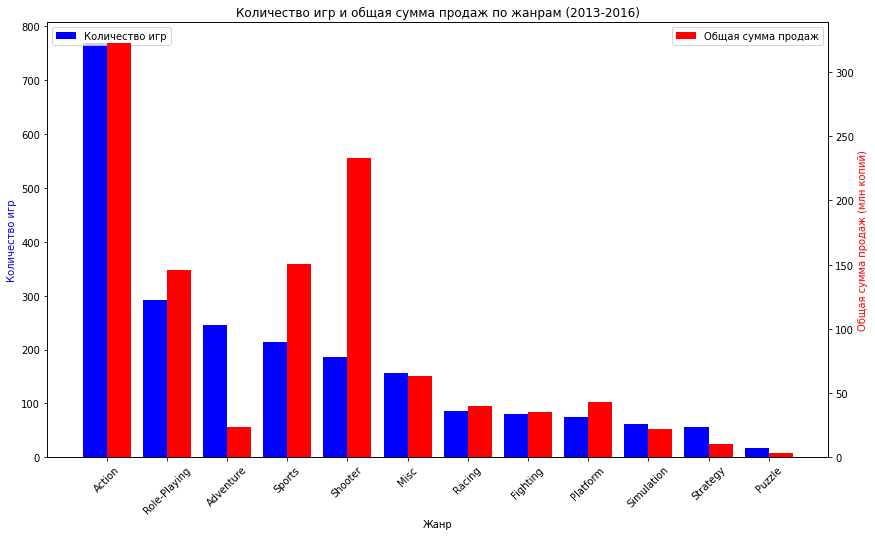

In [45]:
# количества игр по жанрам
genre_counts = filtered_data['genre'].value_counts()

# общая сума продаж по жанрам
genre_sales = filtered_data.groupby('genre')['total_sales'].sum()

# медианные продажи по жанрам
genre_median_sales = filtered_data.groupby('genre')['total_sales'].median()

# объединение данных в один датафрейм
genre_stats = pd.DataFrame({
    'Количество игр': genre_counts,
    'Общая сумма продаж': genre_sales,
    'Медианная сумма продаж': genre_median_sales
}).sort_values(by='Количество игр', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 8))
bar_width = 0.4

# позиции на x-оси для каждой группы столбцов
r1 = range(len(genre_stats))
r2 = [x + bar_width for x in r1]

# построение столбцов для количества игр
ax1.bar(r1, genre_stats['Количество игр'], color='b', width=bar_width, label='Количество игр')
ax1.set_xlabel('Жанр')
ax1.set_ylabel('Количество игр', color='b')
ax1.set_xticks([r + bar_width / 2 for r in range(len(genre_stats))])
ax1.set_xticklabels(genre_stats.index, rotation=45)

# создание второй оси для общей суммы продаж
ax2 = ax1.twinx()
ax2.bar(r2, genre_stats['Общая сумма продаж'], color='r', width=bar_width, label='Общая сумма продаж')
ax2.set_ylabel('Общая сумма продаж (млн копий)', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Количество игр и общая сумма продаж по жанрам (2013-2016)')
plt.show()

Жанры Action, Sports и Shooter являются наиболее прибыльными, причем Shooter выделяется высокой прибыльностью при сравнительно меньшем количестве игр. Жанры Puzzle, Strategy и Fighting имеют низкие показатели как по количеству игр, так и по сумме продаж, что делает их наименее популярными и прибыльными.

</font><font color='Blue'><b>Добавим сравнение медианных продаж.</b></font><br>

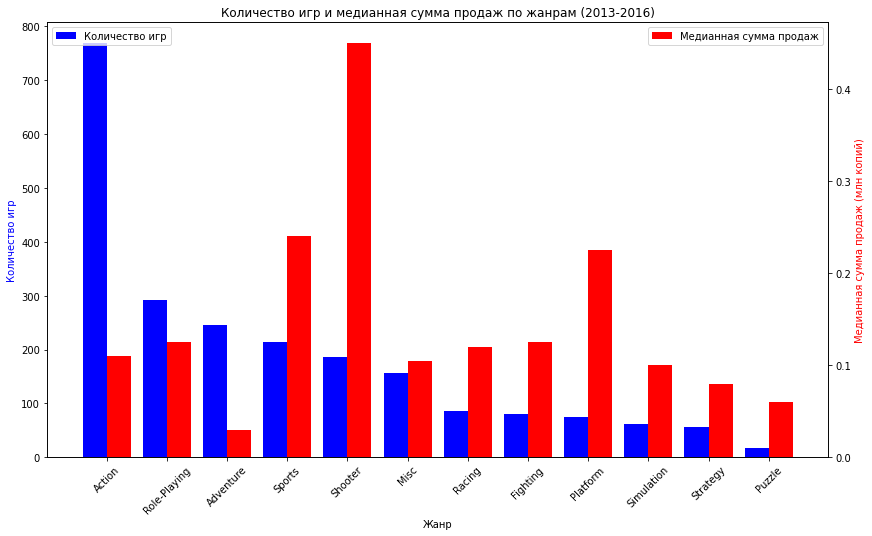

In [46]:
# количества игр по жанрам
genre_counts = filtered_data['genre'].value_counts()

# общая сума продаж по жанрам
genre_sales = filtered_data.groupby('genre')['total_sales'].sum()

# медианные продажи по жанрам
genre_median_sales = filtered_data.groupby('genre')['total_sales'].median()

# объединение данных в один датафрейм
genre_stats = pd.DataFrame({
    'Количество игр': genre_counts,
    'Общая сумма продаж': genre_sales,
    'Медианная сумма продаж': genre_median_sales
}).sort_values(by='Количество игр', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 8))
bar_width = 0.4

# позиции на x-оси для каждой группы столбцов
r1 = range(len(genre_stats))
r2 = [x + bar_width for x in r1]

# построение столбцов для количества игр
ax1.bar(r1, genre_stats['Количество игр'], color='b', width=bar_width, label='Количество игр')
ax1.set_xlabel('Жанр')
ax1.set_ylabel('Количество игр', color='b')
ax1.set_xticks([r + bar_width / 2 for r in range(len(genre_stats))])
ax1.set_xticklabels(genre_stats.index, rotation=45)

# создание второй оси для общей суммы продаж
ax2 = ax1.twinx()
ax2.bar(r2, genre_stats['Медианная сумма продаж'], color='r', width=bar_width, label='Медианная сумма продаж')
ax2.set_ylabel('Медианная сумма продаж (млн копий)', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Количество игр и медианная сумма продаж по жанрам (2013-2016)')
plt.show()

In [47]:
median_sales_per_genre_platform = filtered_data.groupby(['genre', 'platform'])['total_sales'].median().reset_index()
median_sales_per_genre_platform

,genre,platform,total_sales
0,Action,3ds,0.070
1,Action,ds,0.250
2,Action,pc,0.070
3,Action,ps3,0.165
4,Action,ps4,0.155
...,...,...,...
107,Strategy,psv,0.050
108,Strategy,wii,0.260
109,Strategy,wiiu,0.610
110,Strategy,x360,0.280


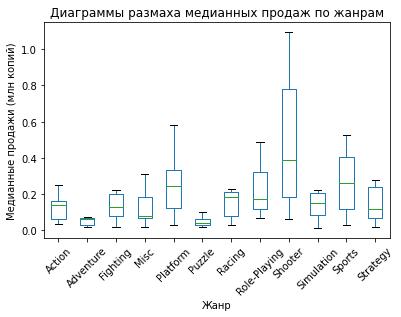

In [48]:
median_sales_per_genre_platform.boxplot(column='total_sales', by='genre', grid=False, showfliers=False)
plt.title('Диаграммы размаха медианных продаж по жанрам')
plt.suptitle('')  
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи (млн копий)')
plt.xticks(rotation=45)
plt.show()

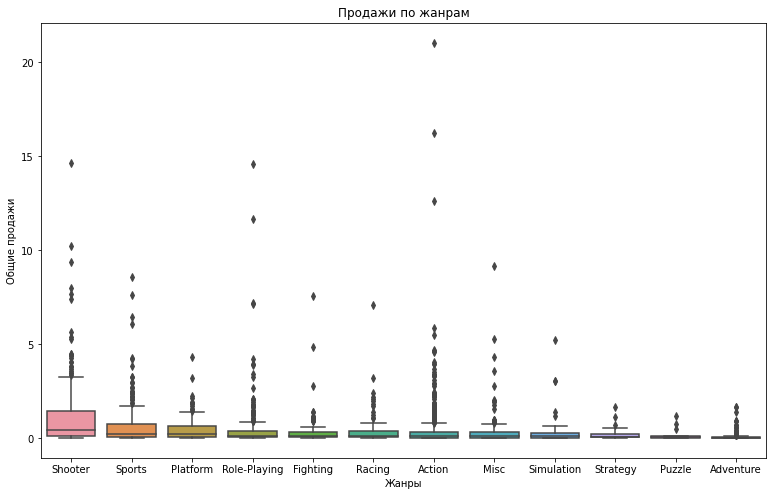

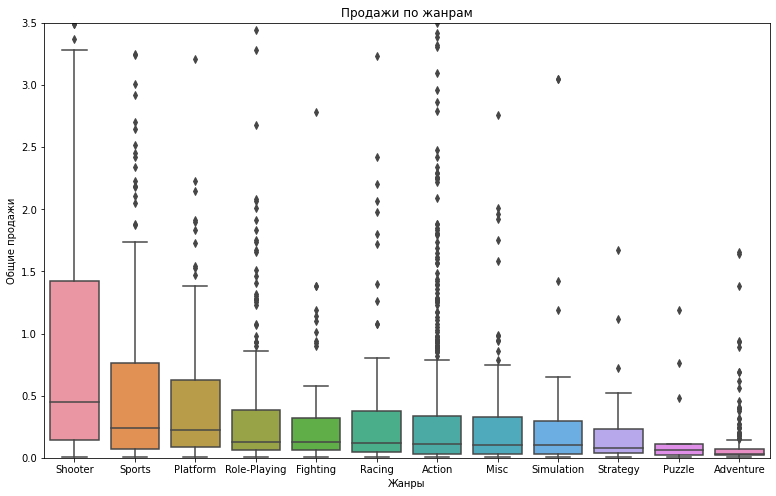

In [49]:
import seaborn as sns
data_temp, y = filtered_data.copy(), 'total_sales'
order = data_temp.groupby('genre')[y].median().sort_values(ascending=False).index # сортируем вывод по медиане

plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre', order = order)
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()

plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre', order = order)
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

Жанры Shooter и Platform имеют наибольшие медианные суммы продаж, несмотря на меньшее количество выпущенных игр в сравнении с жанром Action, это также подтверждается их медианными значениями на диаграмме размаха. Shooter и Role-Playing имеют наибольший размах продаж, что указывает на значительную вариативность успеха, значительный размах имеют так же жанры Platform, Simulation и Sports 

### Вывод по исследовательскому анализу

Статистику наиболее логично учитывать начиная с 1994 года, поскольку данные до этого времени нерелевантны из-за низкого количества выпускаемых игр. Платформы достигают пика продаж в первые 3-5 лет после запуска и сохраняют высокие продажи еще 3-4 года. В период с 2013 по 2016 годы наибольшие глобальные продажи игр наблюдались на платформах PS3, X360, PS4, 3DS и XOne, с PS4 лидирующей к 2016 году. Оценки критиков оказывают умеренное влияние на продажи в отличие от оценок пользователей: последние практически не влияют на популярность игр. Самые продаваемые жанры: Shooter, Platform, Sports, и Role-Playing.

## Портрет пользователя каждого региона

### Определим портреты для пользователя каждого региона (NA, EU, JP).

In [50]:
def top_platforms_and_genres(data, region_sales):
    
    # топ-5 платформ
    top_platforms = (data.groupby('platform')[region_sales]
                     .sum()
                     .sort_values(ascending=False)
                     .head(5))

    # топ-5 жанров
    top_genres = (data.groupby('genre')[region_sales]
                  .sum()
                  .sort_values(ascending=False)
                  .head(5))

    # визуализация
    fig, axs = plt.subplots(1, 2, figsize=(18, 5)) 

    # график для топ-5 платформ
    axs[0].bar(top_platforms.index, top_platforms.values)
    axs[0].set_title(f'Топ 5 платформ - {region_sales}')
    axs[0].set_xlabel('Платформа')
    axs[0].set_ylabel('Общая сумма продаж')

    # график для топ-5 жанров
    axs[1].bar(top_genres.index, top_genres.values)
    axs[1].set_title(f'Топ 5 жанров - {region_sales}')
    axs[1].set_xlabel('Жанр')
    axs[1].set_ylabel('Общая сумма продаж')
    
    plt.tight_layout()
    
    return top_platforms, top_genres

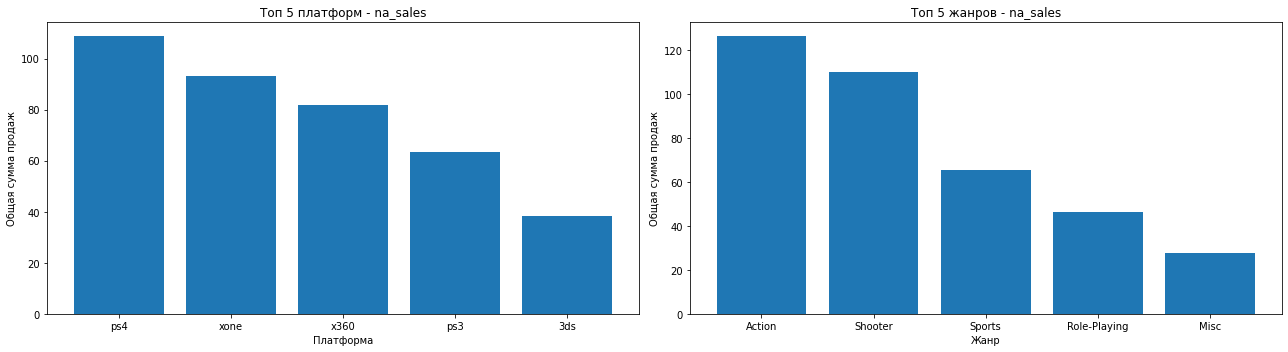

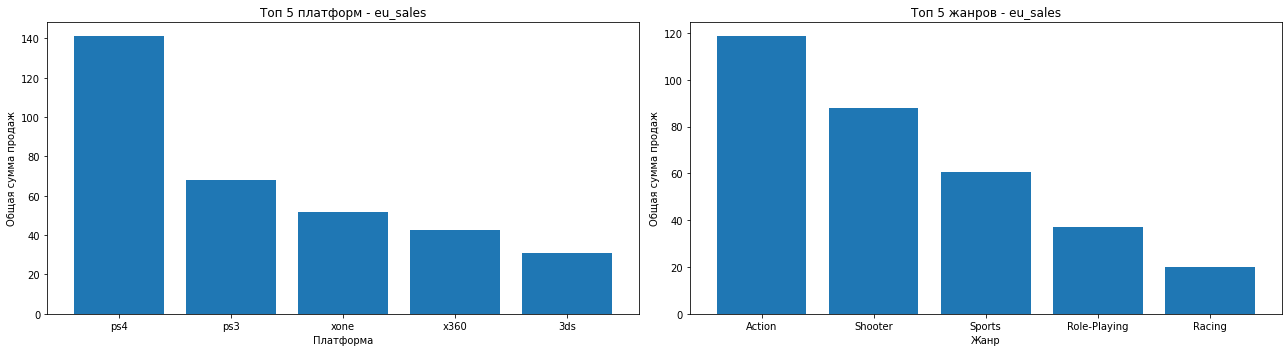

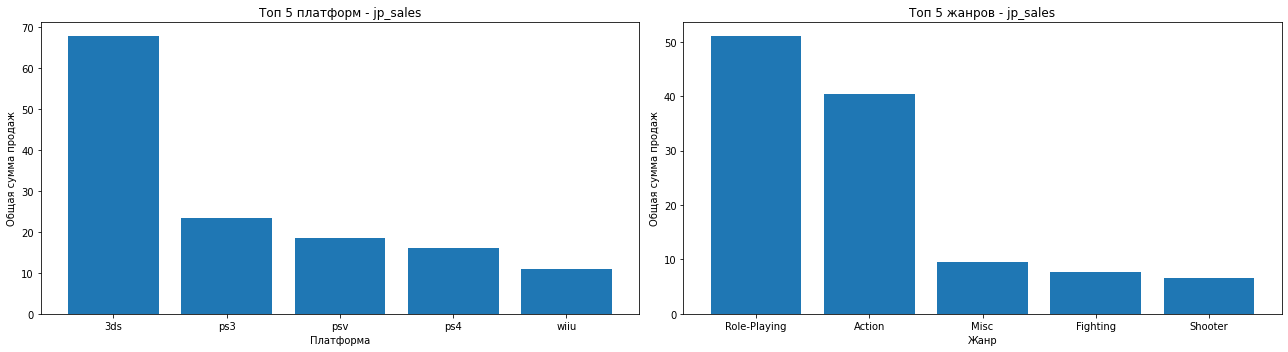

In [51]:
na_top_platforms, na_top_genres = top_platforms_and_genres(filtered_data, 'na_sales')
eu_top_platforms, eu_top_genres = top_platforms_and_genres(filtered_data, 'eu_sales')
jp_top_platforms, jp_top_genres = top_platforms_and_genres(filtered_data, 'jp_sales')

**Северная Америка**: среднестатистический пользователь обычно предпочитает играть на платформах PS4 или XOne в игры жанров Action и Shooter. Популярными так же остаются платформы X360, PS3 и 3DS вместе с жанрами Sports, Misc и Roleplay. 

**Европа**: среднестатистический пользователь обычно предпочитает играть на платформе PS4 в игры жанров Action и Shooter, так же как и пользователь из Северной Америки. Менее популярными, но так же продаваемыми остаются платформы PS3, XOne, X360 и 3DS, а также жанры Sports, Role-playing и Racing. Стоит так же отметить, что Европа - регион с наибольшими продажами, целевой клиент игровой индустрии. Продажи в этом регионе вполовину, а то и в два раза выше, чем в Америке или Японии. 

**Япония**: Этот регион сильно отличается от двух предыдущих. Продажи здесь сильно ниже, а пользователи предпочитают выбирать платформу 3DS. Самые популярные жанры - Role-Playing и Action. С большим отрывом за ними идут платформы PS3, PSV, PS4 и Wiu и жанры Misc, Fighting и Shooter. Разница объясняется достаточно просто - 3DS является японским производителем, это делает платформу привлекательнее и дешевле для японского игрока. 

## Влияние рейтинга ESRB

Посмотрим, какие значения вообще может принимать рейтинг.

In [52]:
filtered_data['rating'].value_counts()

No Rating    978
M            372
T            333
E            302
E10+         252
Name: rating, dtype: int64

Добавим столбец-'словарик' с расшифровкой каждого рейтинга. 

In [53]:
rating_decipher = {
    'No Rating': 'Без рейтинга',
    'E': 'Без ограничений',
    'T': '13+',
    'E10+': '10+',
    'M': '17+',
    'EC': 'Для малышей',
    'RP': 'Рейтинг ожидается)',
    'AO': 'Только для взрослых)'
}

filtered_data['rating_description'] = filtered_data['rating'].map(rating_decipher)
filtered_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_description
16,grand theft auto v,ps3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,17+
23,grand theft auto v,x360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,17+
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,No Rating,14.63,Без рейтинга
33,pokemon x/pokemon y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,No Rating,14.60,Без рейтинга
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,17+


/tmp/ipykernel_289/3135878808.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(na_sales_by_rating.index, rotation=45, ha='right')
/tmp/ipykernel_289/3135878808.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(eu_sales_by_rating.index, rotation=45, ha='right')
/tmp/ipykernel_289/3135878808.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(jp_sales_by_rating.index, rotation=45, ha='right')


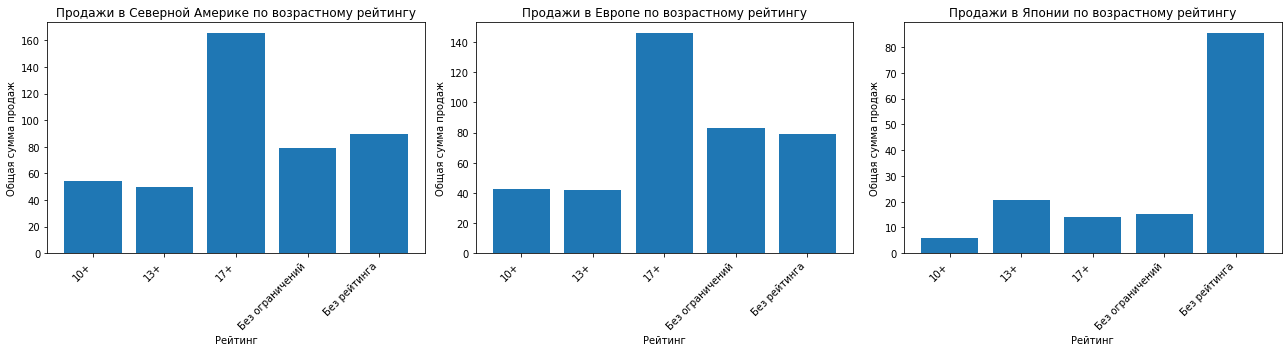

In [54]:
def plot_sales_by_rating(data):
    
    # группировка по рейтингу и продажам
    na_sales_by_rating = data.groupby('rating_description')['na_sales'].sum()
    eu_sales_by_rating = data.groupby('rating_description')['eu_sales'].sum()
    jp_sales_by_rating = data.groupby('rating_description')['jp_sales'].sum()

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # северная америка
    axs[0].bar(na_sales_by_rating.index, na_sales_by_rating.values)
    axs[0].set_title('Продажи в Северной Америке по возрастному рейтингу')
    axs[0].set_xlabel('Рейтинг')
    axs[0].set_ylabel('Общая сумма продаж')
    axs[0].set_xticklabels(na_sales_by_rating.index, rotation=45, ha='right')

    # европа
    axs[1].bar(eu_sales_by_rating.index, eu_sales_by_rating.values)
    axs[1].set_title('Продажи в Европе по возрастному рейтингу')
    axs[1].set_xlabel('Рейтинг')
    axs[1].set_ylabel('Общая сумма продаж')
    axs[1].set_xticklabels(eu_sales_by_rating.index, rotation=45, ha='right')

    # япония
    axs[2].bar(jp_sales_by_rating.index, jp_sales_by_rating.values)
    axs[2].set_title('Продажи в Японии по возрастному рейтингу')
    axs[2].set_xlabel('Рейтинг')
    axs[2].set_ylabel('Общая сумма продаж')
    axs[2].set_xticklabels(jp_sales_by_rating.index, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

plot_sales_by_rating(filtered_data)

В Северной Америке и Европе ситуация схожая: большая часть выручки приходится на игры с рейтингом "17+". Япония отличается: на первом месте по выручке находятся игры "Без рейтинга", на втором - игры для подростков. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются.  

В данном случае для проверки гипотезы лучше всего воспользоваться статистическим тестом, потому что мы хоьим сравнить средние значения двух независимых выборок.

In [55]:
# разделение на две выборки

xone = filtered_data[(filtered_data['platform'] == 'xone') & (filtered_data['user_score'] > 0)]['user_score']
pc = filtered_data[(filtered_data['platform'] == 'pc') & (filtered_data['user_score'] > 0)]['user_score']

In [56]:
t_stat, p_value = stats.ttest_ind(pc, xone) 

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC отличаются.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")

t-statistic: -1.4251670106352106
p-value: 0.15503167687396294
Не отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


### Средние пользовательские рейтинги жанров Action и Sports разные

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports разные.  

Аналогично, воспользуемся статистическим тестом для определения различия между средними значениями двух независимых групп.

In [57]:
action =  filtered_data[(filtered_data['genre'] == 'Action') & (filtered_data['user_score'] > 0)]['user_score']
sports = filtered_data[(filtered_data['genre'] == 'Sports') & (filtered_data['user_score'] > 0)]['user_score']

In [58]:
t_stat, p_value = stats.ttest_ind(action, sports, equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.")
else:
    print("Не отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые.")

t-statistic: 10.242085476872317
p-value: 1.3883444596405356e-20
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.


</font><font color='Blue'><b>Тест указывает на наличие статистически значимого различия между средними значениями двух групп.  Средние пользовательские рейтинги жанров Action и Sports отличаются.</b></font><br>

## Вывод

В ходе данного исследования был проведен анализ игрового рынка последних лет. Были изучены закономерности, определяющие успешность игр на основе исторических данных о продажах, оценках пользователей и критиков, а также жанрах и платформах.

1. Данные были предварительно изучены и обработаны, была проведена проверка на дубликаты, типы данных исправлены, а пропуски заполнены. 
2. Анализ был проведен на основе данных за 2013-2016 годы. Среднее время существования платформы - 8 лет, а пик популярности приходится примерно на середину ее жизненного цикла, соответственно рассматривая изменения на рынке среди платформ в этот временной отрезок наиболее логичен - пик популярности платформ появившихся в это время как раз придется на 2017 год. 
3. В период с 2013 по 2016 годы наибольшие глобальные продажи игр наблюдались на платформах PS3, X360, PS4, 3DS и XOne. Эти платформы обеспечивали как высокие медианные значения продаж, так и наличие игр с экстремально высокими показателями продаж.
4. Самыми продаваемыеми жанранами оказались Shooter, Platform, Sports, и Role-Playing. А вот Puzzle и Strategy требуют осторожного подхода и, возможно, специализированных маркетинговых стратегий для успешного продвижения. Жанры Shooter и Platform имеют наибольшие медианные суммы продаж, несмотря на меньшее количество выпущенных игр в сравнении с жанром Action, однако Action в своей популярности более стабилен и может приносить гарантированные, хоть и менее высокие доходы.
5. Европа - самый "играющий" регион из всех, в отличие от Японии - там продажи меньше аж в два раза.
6. Самые популярные игры имеют рейтинг 17+, а в Японии "Без рейтинга". Поскольку в Японии не работает система ESRB, сделать выводы о возрастной категории игроков в этом регионе сложно. 7+".  


В результате, можно подытожить и обратить внимание компании на следующее:

- Рекламные кампании следует сосредоточить на PS4, Xbox One и 3DS, так как эти платформы показывают наибольшие продажи и популярность в рассматриваемом периоде.
- Приоритетным жанрам для рекламных кампаний должны быть Shooter, Platform и Sports, которые демонстрируют самые высокие медианные значения продаж.
- Основное внимание уделить играм с рейтингом 17+.
- Максимально увеличить рекламный бюджет для Европы и Северной Америки. Поскольку Япония показывает продажи в два раза меньше, чем в Европе, можно сосредоточиться лишь на европейском и американском рынке, либо же использовать специализированные маркетинговые стратегии.
- Учитывать отзывы экспертов при выборе игр для рекламных кампаний, так как они могут значимо повлиять на успех продаж. Самыми продаваемыми играми являются игры, оцененные экспертами на 70+ баллов. 